# Digital Innovation One - Análise de dados com Python e Pandas (3)

<pre>
Autor: Leonardo Simões
Data: 23/06/2021
</pre>

---
## Sumário
- [Introdução](#intro)
- [Preparação dos dados](#data_wrangling) 
- [Aquisição dos dados](#gather)
- [Avaliação dos dados](#evaluation)
- [Limpeza e organização dos dados](#clean_and_tidiness)
- [Análise Exploratória](#eda)

---
<a id='intro'></a>
## Introdução

Projeto prático "Análise de dados com Python e Pandas" do Bootcamp "Banco Carrefour Data Engineer" da Digital Innovation One.

----
<a id='data_wrangling'></a>
## Preparação dos dados

Esta etapa antecede a análise. Aqui, os dados são carregados, avaliados, organizados e limpos, para garantir que as etapas seguintes sejam feitas de modo correto, conscistente e suscinto. A etapa de preparação de dados é divida em outras que consistem nas tarefas citadas anteriormente.

In [1]:
# imports das bibliotecas usadas até a parte da análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Alterar a exibição de float para duas casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

---
<a id='gather'></a>
## Aquisição dos dados

Nesta etapa os dados são carregados em objeto(s) pandas do tipo dataframe. 

In [3]:
df = pd.read_csv("./datasets/Gapminder.csv", sep=';')
df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.80,8425333,779.45
1,Afghanistan,Asia,1957,30.33,9240934,820.85
2,Afghanistan,Asia,1962,32.00,10267083,853.10


---
<a id='evaluation'></a>
## Avaliação dos dados

Nesta etapa, os dataframes são examinados para procurar problemas de organização e qualidade dos dados.

### Informações gerais do dataframe:

In [4]:
def exibir_informacoes_gerais(df):
    # Exibindo informações gerais do dataframe
    valores_na = df.isna().sum()
    informacoes = pd.DataFrame({'Coluna': df.columns,
                                'Tipo': df.dtypes,
                                'Quantidade de ausentes': valores_na,
                                'Porcentagem de ausentes': valores_na / df.shape[0]
                                })
    informacoes.reset_index(drop=True, inplace=True)
    informacoes['Porcentagem de ausentes'] = informacoes['Porcentagem de ausentes'].round(4) * 100
    informacoes['Porcentagem de ausentes'] = informacoes['Porcentagem de ausentes'].astype(str) + ' %'
    #print("Informações gerais das colunas")
    #print(informacoes)
    return informacoes

In [5]:
exibir_informacoes_gerais(df)

,Coluna,Tipo,Quantidade de ausentes,Porcentagem de ausentes
0,country,object,0,0.0 %
1,continent,object,301,9.09 %
2,year,int64,0,0.0 %
3,lifeExp,float64,0,0.0 %
4,pop,int64,0,0.0 %
5,gdpPercap,float64,0,0.0 %


### Descrição das colunas quantitativas do dataframe:

In [6]:
def descrever_colunas_quantitativas(df):
    # Descrevendo colunas numéricas (quantitativas)
    descricao_df = df.describe()
    descricao_df.index = ['quantidade', 'média', 'desvio padrao', 'mínimo', 'quartil 1 (25%)',
                          'mediana - quartil 2 (50%)', 'quartil 3 (75%)', 'máximo']
    # print("Descrição de colunas numéricas")
    # print(descricao_df)
    return descricao_df

In [7]:
descrever_colunas_quantitativas(df)

,year,lifeExp,pop,gdpPercap
quantidade,"3,312.00","3,312.00","3,312.00","3,312.00"
média,"1,980.30",65.25,"31,614,890.82","11,317.12"
desvio padrao,16.93,11.77,"104,119,342.89","11,369.14"
mínimo,"1,950.00",23.60,"59,412.00",241.17
quartil 1 (25%),"1,967.00",58.34,"2,678,572.00","2,514.63"
mediana - quartil 2 (50%),"1,982.00",69.61,"7,557,218.50","7,838.51"
quartil 3 (75%),"1,996.00",73.66,"19,585,221.75","17,357.88"
máximo,"2,007.00",82.67,"1,318,683,096.00","113,523.13"


### Descrição das colunas qualitativas do dataframe:

In [8]:
def descrever_colunas_qualitativas(df):
    # Descrevendo colunas qualitativas
    colunas_qualitativas = df.select_dtypes(exclude=['number']).columns.values
    df_qualitativo = df[colunas_qualitativas]
    if len(df_qualitativo.columns) > 0:
        descricao_qualitativa = pd.DataFrame({'Coluna': df_qualitativo.columns,
                                              'Tipo': df_qualitativo.dtypes,
                                              'Valores únicos': df_qualitativo.nunique(),
                                              'Valor mais comum': df_qualitativo.describe().T['top'],
                                              'Maior frequência': df_qualitativo.describe().T['freq'],
                                              
                                              })
        descricao_qualitativa.reset_index(drop=True, inplace=True)
        #print("Descrição das colunas não numéricas")
        #print(descricao_qualitativa)
        return descricao_qualitativa
    else:
        print("O dataset não possui colunas qualitativas, todas são numéricas.")

In [9]:
descrever_colunas_qualitativas(df)

,Coluna,Tipo,Valores únicos,Valor mais comum,Maior frequência
0,country,object,187,Switzerland,58
1,continent,object,6,Europe,1302


### Avaliação das dimensões dos dataframes:

In [10]:
def printDimensoesDf(df, nome=''):
    print('As dimensões do dataset ' + nome +  ' são ' + str(df.shape[0]) + ' linhas e ' + str(df.shape[1]) + ' colunas.')

In [11]:
#exibir_dimensoes
printDimensoesDf(df, 'atual')

As dimensões do dataset atual são 3312 linhas e 6 colunas.


### Avaliação de colunas:

In [12]:
# Colunas originais do dataframe
colunas_df = df.columns.values
colunas_df

array(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'],
      dtype=object)

### Verificação de linhas duplicadas:

In [13]:
def printNumDuplicadas(df):
    num_duplicadas = df.duplicated().sum()
    print('A quantidade de linhas duplicadas é ' + str(num_duplicadas) + '.')

In [14]:
printNumDuplicadas(df)

A quantidade de linhas duplicadas é 0.


### Verificação de valores ausentes:

In [15]:
df.isna().sum().sum()

301

In [16]:
def printValoresAusentes(df):
    valores_na = df.isna().sum()
    valores_na = valores_na[valores_na > 0].sort_values(ascending=False)

    if not valores_na.empty:
        colunas_na = ', '.join(valores_na.index.values)
        print('As colunas com valores ausentes são: ' + colunas_na + '.')
        print(valores_na)
    else:
        print('Não há colunas com valores ausentes')

In [17]:
printValoresAusentes(df)

As colunas com valores ausentes são: continent.
continent    301
dtype: int64


### Verificação dos tipos de dados das colunas:

In [18]:
df.dtypes.value_counts()

int64      2
object     2
float64    2
dtype: int64

---
<a id='clean_and_tidiness'></a>
## Limpeza e organização dos dados

Nesta etapa, os problemas de organização e qualidade dos dados do dataframe serão resolvidos.

### Preenchendo valores de continent

In [19]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [20]:
df[df['continent']=="FSU"].country.unique()

array(['Belarus', 'Kazakhstan', 'Latvia', 'Lithuania', 'Russia',
       'Ukraine'], dtype=object)

In [21]:
df[df['continent'].isna()].country.unique()

array(['Armenia', 'Aruba', 'Australia', 'Bahamas', 'Barbados', 'Belize',
       'Canada', 'French Guiana', 'French Polynesia', 'Georgia',
       'Grenada', 'Guadeloupe', 'Haiti', 'Hong Kong, China', 'Maldives',
       'Martinique', 'Micronesia, Fed. Sts.', 'Netherlands Antilles',
       'New Caledonia', 'Papua New Guinea', 'Reunion', 'Samoa',
       'Sao Tome and Principe', 'Tonga', 'Uzbekistan', 'Vanuatu'],
      dtype=object)

In [22]:
asia = ['Armenia','Hong Kong, China', 'Maldives', 'Uzbekistan']
americas = ['Aruba','Bahamas','Barbados','Belize','Canada','French Guiana','Grenada','Guadeloupe','Haiti','Martinique','Netherlands Antilles']
africa = ['Reunion', 'Sao Tome and Principe']
oceania = ['Australia','French Polynesia', 'Micronesia, Fed. Sts.','New Caledonia', 'Papua New Guinea', 'Tonga', 'Vanuatu', 'Samoa']
FSU = ['Georgia']

In [23]:
df.loc[df['country'].isin(asia), 'continent'] = 'Asia'
df.loc[df['country'].isin(americas), 'continent'] = 'Americas'
df.loc[df['country'].isin(africa), 'continent'] = 'Africa'
df.loc[df['country'].isin(oceania), 'continent'] = 'Oceania'
df.loc[df['country'].isin(FSU), 'continent'] = 'FSU'

In [24]:
assert df.isnull().sum().sum() == 0

In [25]:
assert np.all(df[df['country'].isin(asia)]['continent'] == 'Asia')
assert np.all(df[df['country'].isin(americas)]['continent'] == 'Americas')
assert np.all(df[df['country'].isin(africa)]['continent'] == 'Africa')
assert np.all(df[df['country'].isin(oceania)]['continent'] == 'Oceania')
assert np.all(df[df['country'].isin(FSU)]['continent'] == 'FSU')

### Savando dataframe em arquivo .csv

In [26]:
#df.to_csv('Gapminder_V2.csv', index=False)

---
<a id='eda'></a>
## Análise Exploratória

Colunas que podem ser analisadas:

In [27]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [28]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.80,8425333,779.45
1,Afghanistan,Asia,1957,30.33,9240934,820.85
2,Afghanistan,Asia,1962,32.00,10267083,853.10
3,Afghanistan,Asia,1967,34.02,11537966,836.20
4,Afghanistan,Asia,1972,36.09,13079460,739.98


Perguntas:

    1) Quantos países foram analisados?
    2) Qual o período (anos) foi analisado?
    3) Quais os 5 países com maior expecativa de vida média no último ano registrado?
    4) Quais os 5 países com maior Gross Domestic Product per capita média no último ano registrado?
    5) Qual país mais populoso no último ano registrado?
    6) Qual o valor da correlação linear entre expectativa de vida, população e ano?
    7) Como são alguns dos gráficos de distribuição univariáveis e bivariáveis?

    1) Quantos países foram analisados?

In [29]:
df['country'].nunique()

187

    2) Qual o período (anos) foi analisado?

In [30]:
df['year'].min(), df['year'].max()

(1950, 2007)

    3) Quais os 5 países com maior expecativa de vida média no último ano registrado?

In [37]:
df.groupby('country')['lifeExp'].mean().sort_values(ascending=False)[:5]

country
Martinique                  78.78
Guadeloupe                  78.41
Iceland                     76.23
Cyprus                      76.13
Sweden                      76.02
Name: lifeExp, dtype: float64

    4) Quais os 5 países com maior Gross Domestic Product per capita média no último ano registrado?

In [38]:
df.groupby('country')['gdpPercap'].mean().sort_values(ascending=False)[:5]

country
Kuwait                            65,332.91
Qatar                             60,997.80
Brunei                            54,716.02
Luxembourg                        34,439.39
United Arab Emirates              33,541.70
Name: gdpPercap, dtype: float64

    5) Qual país mais populoso no último ano registrado?

In [39]:
ultimo_ano = df['year'].max()
ultimo_ano

2007

In [46]:
df_ultimo_ano = df.query('year == @ultimo_ano')
df_ultimo_ano = df_ultimo_ano.set_index('country')
df_ultimo_ano['pop'].sort_values(ascending=False)[:5]

country
China            1318683096
India            1110396331
United States     301139947
Indonesia         223547000
Brazil            190010647
Name: pop, dtype: int64

    6) Qual o valor da correlação linear entre expectativa de vida, população e ano?

In [47]:
def plotar_correlacao(df):
    print('Mapa de calor das correlações')
    corrMatrix = df.corr()
    fig = plt.figure(figsize=(13, 9))
    ax = sns.heatmap(corrMatrix, annot=True)
    ax.set_title('Gráfico de calor de correlações das variáveis')
    plt.show()

Mapa de calor das correlações


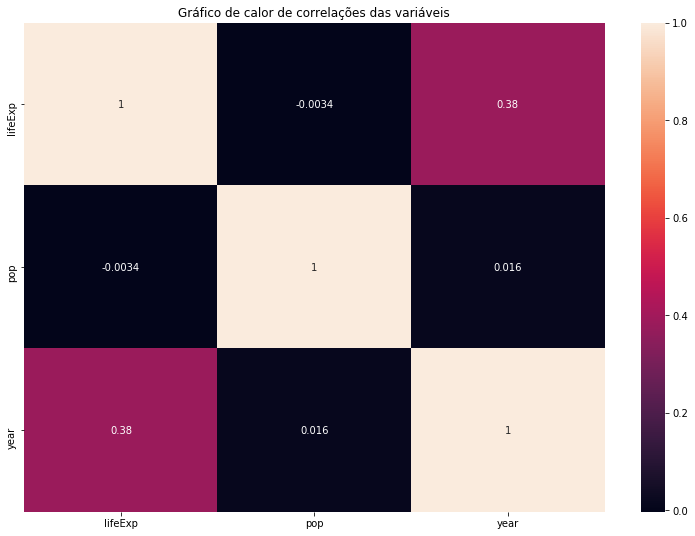

In [49]:
plotar_correlacao(df[['lifeExp','pop','year']])

    7) Como são alguns dos gráficos de distribuição univariáveis e bivariáveis?

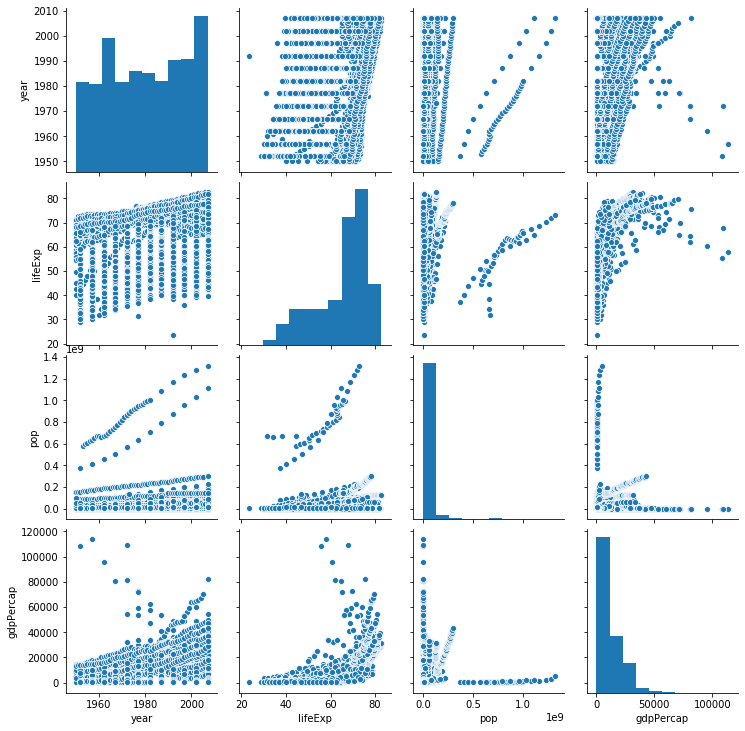

In [55]:
sns.pairplot(df);